# CNN 

Mnist  [0  -->  9]

In [1]:
import pandas as pd


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_X,train_y=train.iloc[:,1:],train.iloc[:,0]
train_X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
len(train)

42000

In [5]:
size=train_X.shape[0]
size

42000

In [6]:
train_X=train_X.values.reshape(size,28,28)
train_X.shape

(42000, 28, 28)

In [7]:
test=test.values

### Standard scaler

In [8]:
train_X=train_X/255
test_=test/255

## Visualize Image

In [9]:
import matplotlib.pyplot as plt 


1


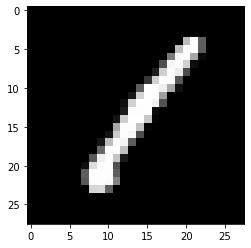

In [10]:
print(train_y[0])
plt.imshow(train_X[0],cmap='gray')
plt.show()

8


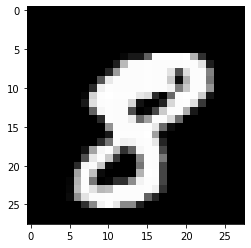

In [11]:
print(train_y[10])
plt.imshow(train_X[10],cmap='gray')
plt.show()

8


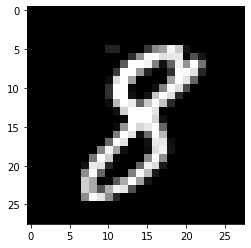

In [12]:
print(train_y[20])
plt.imshow(train_X[20],cmap='gray')
plt.show()

# Reshape 


In [13]:
train_X=train_X.reshape(size,28,28,1)
train_X.shape

(42000, 28, 28, 1)

In [14]:
## Example
train_X2=[]
for i in range(0,42000):
    train_X2.append(train_X[i].reshape(28,28))

import numpy as np 
np.array(train_X2).shape   

(42000, 28, 28)

In [15]:
train_y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
train_y=to_categorical(train_y)

In [18]:
train_y.shape

(42000, 10)

### CNN Model 

In [19]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [20]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten()) # convert 2D to 1D
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))# output layer 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [22]:
history=model.fit(train_X,train_y,validation_split=0.2,batch_size=32,epochs=5)

Epoch 1/5
1050/1050 [==============================] - 33s 30ms/step - loss: 0.2135 - accuracy: 0.9339 - val_loss: 0.0719 - val_accuracy: 0.9776
Epoch 2/5
1050/1050 [==============================] - 30s 28ms/step - loss: 0.0584 - accuracy: 0.9821 - val_loss: 0.0476 - val_accuracy: 0.9840
Epoch 3/5
1050/1050 [==============================] - 28s 27ms/step - loss: 0.0393 - accuracy: 0.9880 - val_loss: 0.0412 - val_accuracy: 0.9880
Epoch 4/5
1050/1050 [==============================] - 28s 27ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0407 - val_accuracy: 0.9883
Epoch 5/5
1050/1050 [==============================] - 30s 28ms/step - loss: 0.0240 - accuracy: 0.9927 - val_loss: 0.0380 - val_accuracy: 0.9905


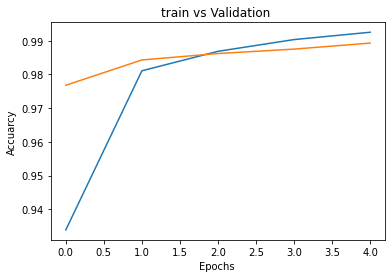

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("train vs Validation ")
plt.xlabel("Epochs ")
plt.ylabel("Accuarcy")
plt.show()

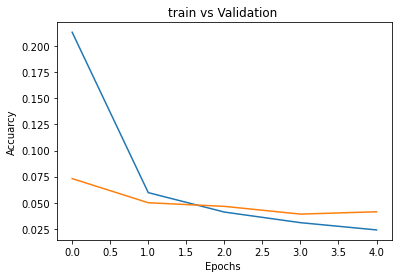

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("train vs Validation ")
plt.xlabel("Epochs ")
plt.ylabel("Accuarcy")
plt.show()